In [173]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.colors import ListedColormap

# Problem 1

In [174]:
# Reads diabetes dataset
df = pd.read_csv(r'C:\Users\achica1\Desktop\ML-DataSets\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
x = df.values[:, :7]
y = df.values[:, 8]

# Use 80% and 20% split between training and evaluation (test).
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=np.random)

# MIN MAX scaling
sc = MinMaxScaler()
x = sc.fit_transform(x)

# Create a scaler object
sd = StandardScaler()

# Fit the scaler to the training data transform
x_train_std = sd.fit_transform(x_train)

# Apply the scaler to the test data
x_test_std = sd.transform(x_test)

In [176]:
# build a logistic regression binary classifier for positive diabetes
cl = LogisticRegression()
cl.fit(x_train, y_train)
y_pred = cl.predict(x_test)

In [177]:
# Report your results, including accuracy, precision, and recall
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.8116883116883117
Precision: 0.7368421052631579
Recall: 0.5957446808510638


[[97 10]
 [19 28]]


Text(33.0, 0.5, 'Actual Label')

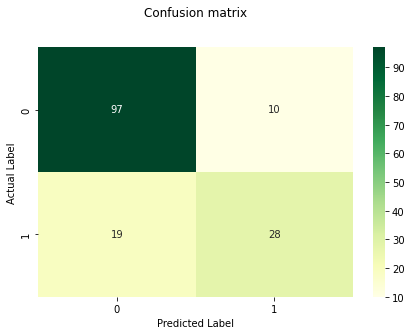

In [178]:
# plot the confusion matrix representing binary classifier. 
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# Let's visualize the results of the model in the form of a co#nfusion matrix using mat 
# Here, you will visualize the confusion matrix using Heatmap. 
import seaborn as sns
from matplotlib.colors import ListedColormap

# Name of classes
class_names = [0, 1]
#fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGn', fmt='g') 
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Problem 2

In [179]:
# Perform the training for K-fold: 5
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, x, y, cv = kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 75.907% (3.750%)


In [180]:
# Perform the training for K-fold: 10
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, x, y, cv = kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.816% (5.159%)


In [181]:
# Construct a confusion matrix
test_size = 0.2
seed = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train_std, y_train)
predicted = model.predict(x_train_std)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(report)

[[97 10]
 [19 28]]
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        47
   Malignant       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 257.44, 'Predicted label')

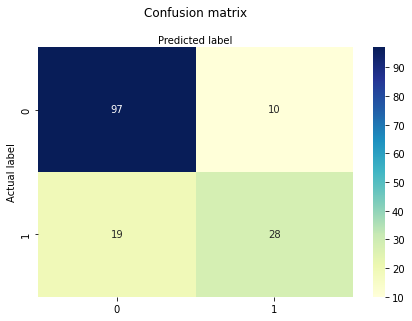

In [182]:
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Problem 3

In [183]:
# Use the cancer dataset to build a logistic regression model to classify 
# the type of cancer (Malignant vs. benign).

from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [184]:
breast_input = pd.DataFrame(breast_data) 
breast_input.head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [185]:
breast_labels = breast.target 
breast_labels.shape 

(569,)

In [186]:
labels = np.reshape(breast_labels,(569,1)) 
final_breast_data = np.concatenate([breast_data,labels],axis=1) 
final_breast_data.shape 

(569, 31)

In [187]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names 
features 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [188]:
features_labels = np.append(features,'label') 
breast_dataset.columns = features_labels
breast_dataset.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [189]:
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [190]:
breast_dataset.shape

(569, 31)

In [191]:
# 1. First, create a logistic regression that takes all 30 input features for classification
x = breast_dataset.values[:,0:30]
y = breast_dataset.values[:,30]

# Use 80% and 20% split between training and evaluation (test).
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=np.random)

# Min Max Scaling
sc = MinMaxScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

# Create a scaler object
sd = StandardScaler()

# Fit the scaler to the training data transform
x_train_std = sd.fit_transform(x_train)

# Apply the scaler to the test data
x_test_std = sd.transform(x_test)

In [192]:
# Confusion Matrix
test_size = 0.2
seed = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train_sc, y_train)
y_pred = model.predict(x_test_std)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(report)

[[41  6]
 [ 0 67]]
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        47
   Malignant       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 257.44, 'Predicted label')

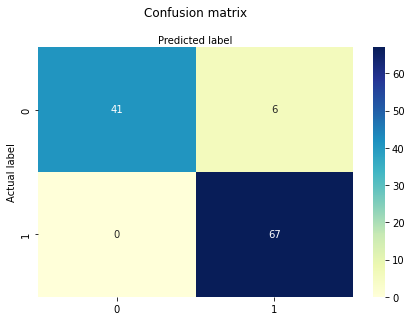

In [193]:
# Visualize the confusion matrix using Heatmap
class_names=[0,1] # name of classes
fid, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [194]:
# 2.  Add the weight penalty and repeat the training and report the results. 
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression Model
C = [100, 50, 20, 10, 1]
for c in C:
    clf = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(x_train_std, y_train))
    print('Test accuracy:', clf.score(x_test_std, y_test))
    print('')

C: 100
Training accuracy: 0.8747252747252747
Test accuracy: 0.9210526315789473

C: 50
Training accuracy: 0.8989010989010989
Test accuracy: 0.9122807017543859

C: 20
Training accuracy: 0.9098901098901099
Test accuracy: 0.9298245614035088

C: 10
Training accuracy: 0.9164835164835164
Test accuracy: 0.8947368421052632

C: 1
Training accuracy: 0.5010989010989011
Test accuracy: 0.5087719298245614



# Problem 4

In [195]:
# 1. Repeat problem 3, this time use K-fold cross-validation for the training and validation. 
# Perform the training two times for K=5 and K=10. 

# Use 80% and 20% split between training and evaluation (test).
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=np.random)

# Min Max Scaling
sc = MinMaxScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

# Create a scaler object
sd = StandardScaler()

# Fit the scaler to the training data transform
x_train_std = sd.fit_transform(x_train)

# Apply the scaler to the test data
x_test_std = sd.transform(x_test)

# K-fold: 5
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, x, y, cv = kfold)

# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.434% (2.737%)


In [196]:
# K-fold: 10
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, x, y, cv = kfold)

# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.254% (3.849%)


In [197]:
test_size = 0.2
seed = 0
x_train, x_test, x_train, x_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        47
   Malignant       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 257.44, 'Predicted label')

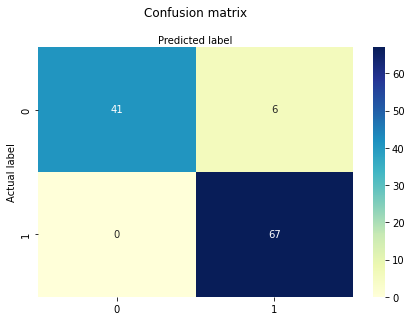

In [198]:
# Confusion Matrix
class_names=[0,1] # name of classes
fid, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = "YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [199]:
# 2. Add the weight penalty and repeat the training 

C = [100, 50, 20, 10, 1]

for c in C:
    clf = LogisticRegression(penalty = 'l1', C=c, solver = 'liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(x_train_sc, y_train))
    print('Test accuracy:', clf.score(x_test_sc, y_test))
    print('')

C: 100
Training accuracy: 0.7714285714285715
Test accuracy: 0.8508771929824561

C: 50
Training accuracy: 0.7230769230769231
Test accuracy: 0.8333333333333334

C: 20
Training accuracy: 0.643956043956044
Test accuracy: 0.7719298245614035

C: 10
Training accuracy: 0.7274725274725274
Test accuracy: 0.7719298245614035

C: 1
Training accuracy: 0.6505494505494506
Test accuracy: 0.5789473684210527

